In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.multiclass import unique_labels

In [2]:
train_dir = 'D:/SkinCancerDatasets/FinalDataset/train/'
test_dir = 'D:/SkinCancerDatasets/FinalDataset/test/'

In [3]:
num_classes = 2  # Dos clases en tu dataset (por ejemplo, 'gato' y 'perro')
batch_size = 32
epochs = 60

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

In [5]:
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Tamaño de entrada de InceptionV3
    batch_size=batch_size,
    class_mode='binary',  # Modo binario para dos clases
)

Found 700 images belonging to 2 classes.


In [7]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',
)

Found 300 images belonging to 2 classes.


In [8]:
base_model = InceptionV3(weights='imagenet', include_top=False)

In [9]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Una neurona para clasificación binaria

In [10]:
model = Model(inputs=base_model.input, outputs=predictions)

In [11]:
for layer in base_model.layers:
    layer.trainable = False

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=len(test_generator),
)

Epoch 1/60
22/22 [==============================] - 39s 2s/step - loss: 0.8107 - accuracy: 0.6486 - val_loss: 0.6484 - val_accuracy: 0.6600
Epoch 2/60
22/22 [==============================] - 27s 1s/step - loss: 0.4911 - accuracy: 0.7657 - val_loss: 0.5447 - val_accuracy: 0.7167
Epoch 3/60
22/22 [==============================] - 28s 1s/step - loss: 0.4237 - accuracy: 0.8143 - val_loss: 0.5391 - val_accuracy: 0.7200
Epoch 4/60
22/22 [==============================] - 29s 1s/step - loss: 0.3999 - accuracy: 0.8171 - val_loss: 0.5641 - val_accuracy: 0.7133
Epoch 5/60
22/22 [==============================] - 27s 1s/step - loss: 0.4412 - accuracy: 0.8186 - val_loss: 0.6758 - val_accuracy: 0.6867
Epoch 6/60
22/22 [==============================] - 27s 1s/step - loss: 0.3538 - accuracy: 0.8457 - val_loss: 0.5469 - val_accuracy: 0.7500
Epoch 7/60
22/22 [==============================] - 28s 1s/step - loss: 0.3473 - accuracy: 0.8386 - val_loss: 0.5654 - val_accuracy: 0.7133
Epoch 8/60
22/22 [==

In [14]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f'Loss: {test_loss}, Accuracy: {test_accuracy}')

10/10 [==============================] - 8s 772ms/step - loss: 0.9604 - accuracy: 0.7433
Loss: 0.9603608250617981, Accuracy: 0.7433333396911621


In [15]:
y_pred = model.predict(test_generator, steps=len(test_generator)).round()

y_true = test_generator.classes

confusion = confusion_matrix(y_true, y_pred)

class_names = unique_labels(y_true, y_pred)

10/10 [==============================] - 9s 767ms/step


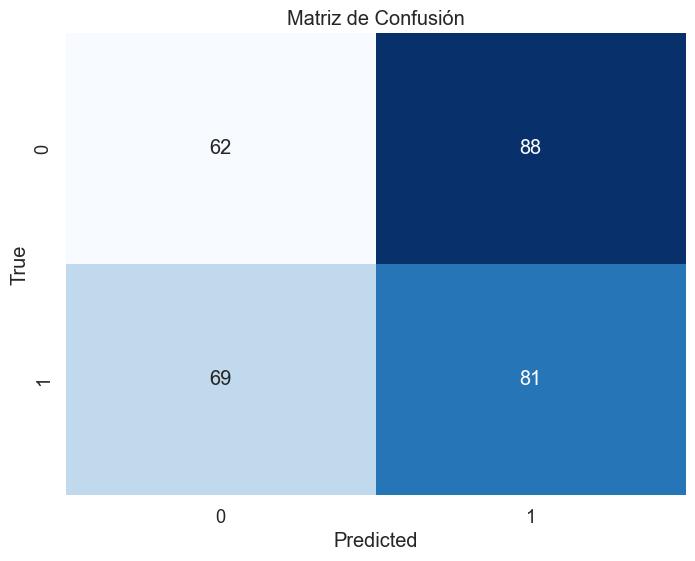

In [18]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión')
plt.show()

In [17]:
report = classification_report(y_true, y_pred)
print("\nInforme de Clasificación:")
print(report)


Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.47      0.41      0.44       150
           1       0.48      0.54      0.51       150

    accuracy                           0.48       300
   macro avg       0.48      0.48      0.47       300
weighted avg       0.48      0.48      0.47       300

